In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
label_encoders = {}   #Dictionary for each column encoder

for column in df.select_dtypes(include=['object']).columns: 
    le = LabelEncoder()                                      
    df[column] = le.fit_transform(df[column])                
    label_encoders[column] = le                              

    #this basically loops over all the text columns and after making a new label encoder we are converting text to numbers
    #and then saving the encoder for that column for future decoding.

In [6]:
X = df.drop('y', axis=1)
y = df['y']
#removing the column y and taking this only column to predict the results

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#firstly training the dataset and then testing it
#test size - 0.2 means that 20% will go to the testing and 80% will go to the training
#random_state 42 means it will split the rows with equal number every time

In [16]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)
#creating a decision tree and training the model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
y_pred = clf.predict(X_test)
#making the predictions. The trained tree will now try to guess yes/no for the customers he has never seen before

In [18]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {acc:.2f}%")

# Confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual No", "Actual Yes"],
    columns=["Predicted No", "Predicted Yes"]
)
print("\nConfusion Matrix:\n", cm_df)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#evaluating the results

Accuracy: 88.42%

Confusion Matrix:
             Predicted No  Predicted Yes
Actual No           7799            153
Actual Yes           894            197

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043



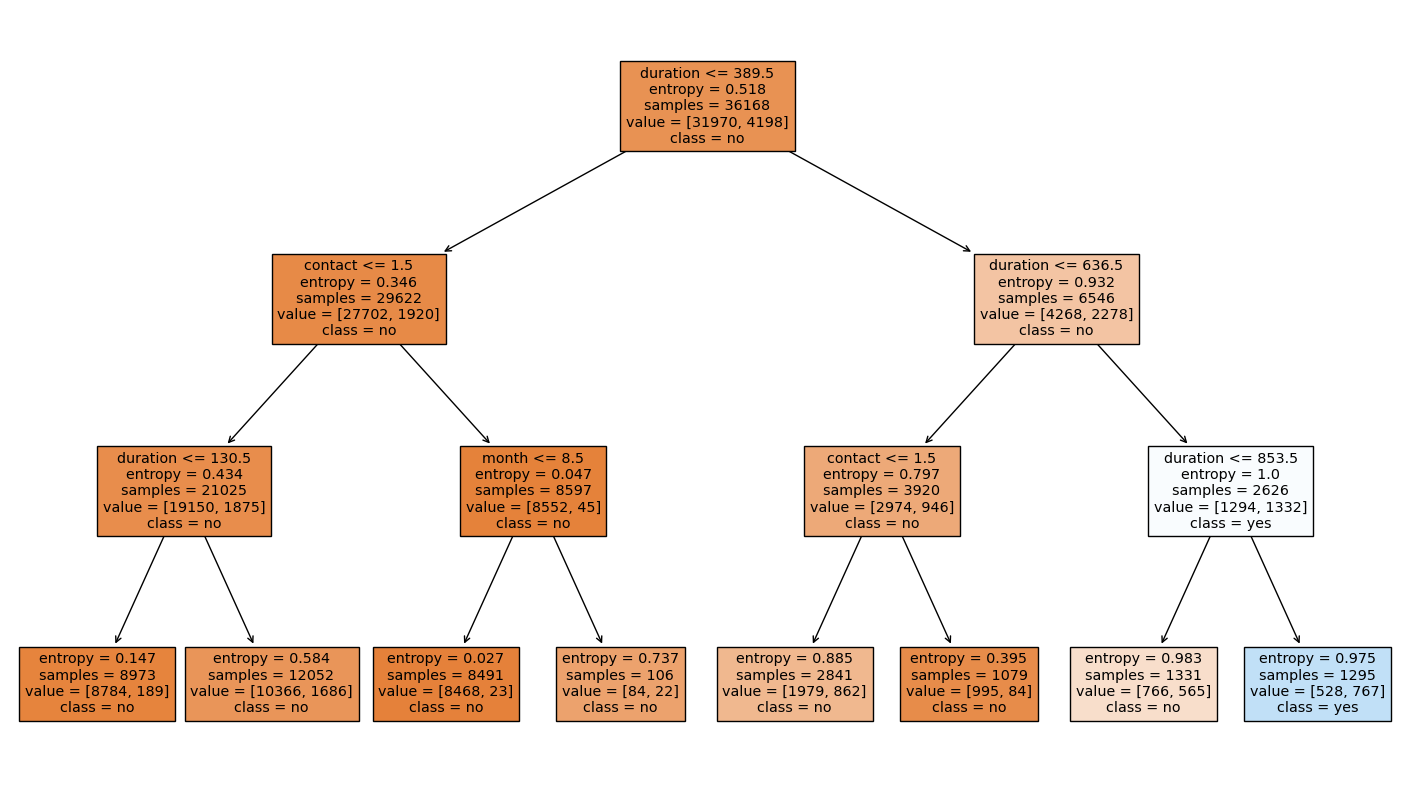

In [20]:
plt.figure(figsize=(18,10))
plot_tree(
    clf,
    feature_names=list(X.columns), 
    class_names=["no", "yes"],    
    filled=True
)
plt.show()
